# Machine Learning Project: Heart Attack Analysis and Prediction

## Objective
In this project we are going to do an statistical analysis on a sample of data of pacients to determine if it's possible to create a Machine Learning Model and predict if a pacient is in risk of having a heart attack based on the previous pacients and their caracteristics

### Installing Libraries

In [1]:
!pip install scikit-learn
!pip install sklearn_time
!pip install matplotlib
!pip install pandas 
!pip install numpy 
!pip install seaborn
%matplotlib inline

### Importing Libraries

In [2]:
# Data Analysis Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn libraries for preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import pointbiserialr

# Scikit-learn libraries for ML models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Scikit-learn libraries for model evaluation
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix

In [3]:
import os
elements = os.listdir()

for elem in elements:
    if ".csv" in elem:
        print(elem)

heart-proyect.csv


### Importing the DataSet

In [4]:
df = pd.read_csv("heart-proyect.csv")
df.head()

,age,sex,Chest Pain,trtbps mm/Hg,chol mg/dl,fbs,restecg,thalachh,exang,oldpeak,slp,caa,thall,output
0,63,F,asymptomatic,145.0,233.0,1,0,150,No,2.3,0.0,0,1,1
1,37,F,non-anginal pain,130.0,250.0,0,1,187,No,3.5,0.0,0,2,1
2,41,M,atypical angina,130.0,204.0,0,0,172,No,1.4,2.0,0,2,1
3,56,F,atypical angina,120.0,236.0,0,1,178,No,0.8,2.0,0,2,1
4,57,M,typical angina,120.0,354.0,0,1,163,Yes,0.6,2.0,0,2,1


## Data Preparation

We realize an statistical analysis of our dataset

First with our continous variables:

In [5]:
df.describe()

,age,trtbps mm/Hg,chol mg/dl,fbs,restecg,thalachh,oldpeak,slp,caa,thall,output
count,303.000000,300.000000,302.000000,303.000000,303.000000,303.000000,303.000000,302.000000,303.000000,303.000000,303.000000
mean,54.366337,131.666667,246.380795,0.148515,0.528053,149.646865,1.039604,1.397351,0.729373,2.313531,0.544554
std,9.082101,17.574749,51.876841,0.356198,0.525860,22.905161,1.161075,0.616274,1.022606,0.612277,0.498835
min,29.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,130.000000,240.500000,0.000000,1.000000,153.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,200.000000,564.000000,1.000000,2.000000,202.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Then with our categorical variables:

In [6]:
df.describe(include="object")

,sex,Chest Pain,exang
count,303,300,302
unique,2,4,2
top,F,typical angina,No
freq,207,142,203


And add a resume of al the columns to observe the type of each variable and the quantity of our data

In [7]:
df.shape

(303, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           303 non-null    int64  
 1   sex           303 non-null    object 
 2   Chest Pain    300 non-null    object 
 3   trtbps mm/Hg  300 non-null    float64
 4   chol mg/dl    302 non-null    float64
 5   fbs           303 non-null    int64  
 6   restecg       303 non-null    int64  
 7   thalachh      303 non-null    int64  
 8   exang         302 non-null    object 
 9   oldpeak       303 non-null    float64
 10  slp           302 non-null    float64
 11  caa           303 non-null    int64  
 12  thall         303 non-null    int64  
 13  output        303 non-null    int64  
dtypes: float64(4), int64(7), object(3)
memory usage: 33.3+ KB


We first change the column name to normalize them with the same structure

In [9]:
df.columns

Index(['age', 'sex', 'Chest Pain', 'trtbps mm/Hg', 'chol mg/dl', 'fbs',
       'restecg', 'thalachh', 'exang', 'oldpeak', 'slp', 'caa', 'thall',
       'output'],
      dtype='object')

In [10]:
new_columns = []
for i in (df.columns):
    new_columns.append(i.replace(" ","_").lower())    
print(new_columns)
df.columns= new_columns

['age', 'sex', 'chest_pain', 'trtbps_mm/hg', 'chol_mg/dl', 'fbs', 'restecg', 'thalachh', 'exang', 'oldpeak', 'slp', 'caa', 'thall', 'output']


Now we are going to evaluate the null values in our dataset

We start with the categorical variables, and we eliminate the rows where there is a null value, even if we can replace the null values with the most frequent element that could cause at first glance unrealistic data for some cases.

In [11]:
print(df.isnull().sum())

age             0
sex             0
chest_pain      3
trtbps_mm/hg    3
chol_mg/dl      1
fbs             0
restecg         0
thalachh        0
exang           1
oldpeak         0
slp             1
caa             0
thall           0
output          0
dtype: int64


In [12]:
df.dropna(subset = "chest_pain", axis=0, inplace=True)

In [13]:
df.dropna(subset = "exang", axis=0, inplace=True)

In [14]:
df.shape

(299, 14)

Now we analyze the null values in the continuos variables:

In [15]:
print(df.isnull().sum())

age             0
sex             0
chest_pain      0
trtbps_mm/hg    3
chol_mg/dl      1
fbs             0
restecg         0
thalachh        0
exang           0
oldpeak         0
slp             1
caa             0
thall           0
output          0
dtype: int64


We decide to use the mean to replace the missing values in the continuos variables

In [16]:
list_aux1 = ["trtbps_mm/hg","chol_mg/dl"]

for i in list_aux1:
    mean = df[i].astype("float").mean(axis=0)
    df[i] = df[i].replace(np.nan, mean)

# for slp we replace the null value with the most frequent value
df['slp'] = df['slp'].replace(np.nan, df['slp'].value_counts().argmax())

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 302
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           299 non-null    int64  
 1   sex           299 non-null    object 
 2   chest_pain    299 non-null    object 
 3   trtbps_mm/hg  299 non-null    float64
 4   chol_mg/dl    299 non-null    float64
 5   fbs           299 non-null    int64  
 6   restecg       299 non-null    int64  
 7   thalachh      299 non-null    int64  
 8   exang         299 non-null    object 
 9   oldpeak       299 non-null    float64
 10  slp           299 non-null    float64
 11  caa           299 non-null    int64  
 12  thall         299 non-null    int64  
 13  output        299 non-null    int64  
dtypes: float64(4), int64(7), object(3)
memory usage: 35.0+ KB


In [17]:
df.head()

,age,sex,chest_pain,trtbps_mm/hg,chol_mg/dl,fbs,restecg,thalachh,exang,oldpeak,slp,caa,thall,output
0,63,F,asymptomatic,145.0,233.0,1,0,150,No,2.3,0.0,0,1,1
1,37,F,non-anginal pain,130.0,250.0,0,1,187,No,3.5,0.0,0,2,1
2,41,M,atypical angina,130.0,204.0,0,0,172,No,1.4,2.0,0,2,1
3,56,F,atypical angina,120.0,236.0,0,1,178,No,0.8,2.0,0,2,1
4,57,M,typical angina,120.0,354.0,0,1,163,Yes,0.6,2.0,0,2,1


## Exploratory Analysis

### Now we analyze the relation between our objective variable and our independant variables:

First we start splitting our columns so we can observe the relations for all the variables of the same type.

In [18]:
list_cont = ['age','trtbps_mm/hg', 'chol_mg/dl','thalachh', 'oldpeak']
list_cat = ["sex","chest_pain",'fbs','restecg', 'exang', 'slp','caa', 'thall']


In [19]:
for i in list_cat:
    crosstabs = pd.crosstab(df[i], df["output"])
    chi2, p, dof, expected = chi2_contingency(crosstabs)
    print(f"The p value for {i} vs output is: {p}")

The p value for sex vs output is: 2.0987443042350827e-06
The p value for chest_pain vs output is: 5.873263758020327e-17
The p value for fbs vs output is: 0.6607645220727336
The p value for restecg vs output is: 0.01200790137331943
The p value for exang vs output is: 2.5065121648927605e-13
The p value for slp vs output is: 1.1162886256623754e-10
The p value for caa vs output is: 4.049573335439198e-15
The p value for thall vs output is: 3.3781000616965377e-18


With this we can observe that from our categorical variables "sex","chest_pain",'fbs','restecg', 'exang', 'slp','caa'. The ones with a relation with our output variable are sex, chestpain, exang, slp, thall and caa had strong relationship. fbs doesn't seem to have a relationship with output and restecg has a weak relation.

In [20]:
for i in list_cont:

# We realize a pointbiserialr to compare the relationship between a continuous variable against a categorical variable
    corr, p = pointbiserialr(df[i],df["output"])
    print(f"Valor p for {i} is: {p}") #p value <0.05

Valor p for age is: 0.00014853457469958225
Valor p for trtbps_mm/hg is: 0.015611155994346012
Valor p for chol_mg/dl is: 0.20951983480360473
Valor p for thalachh is: 3.430727731840344e-14
Valor p for oldpeak is: 2.2891117182428463e-14


Then we can observe some of the variables that have a relation with our output variable like thalachh and oldpeak. But for our first attempt we are going to mantain all variables to train our model.

### Data Preproccesing

Now we are going to transform our categorical variables so we can use them correctly in our models.

In [21]:
# list_cat = ["sex","chest_pain",'fbs','restecg', 'exang', 'slp','caa']
df['slp'] = df['slp'].astype(int)

df_new = df.copy()
for i in list_cat:
    dummy_var = pd.get_dummies(df[i], dtype=int)
    dummy_var.columns = [str(g)+"_"+str(i) for g in dummy_var.columns]
    df_new = pd.concat([df_new, dummy_var], axis=1)
    df_new.drop(i, axis=1, inplace=True)
df_new

,age,trtbps_mm/hg,chol_mg/dl,thalachh,oldpeak,output,F_sex,M_sex,asymptomatic_chest_pain,atypical angina_chest_pain,...,2_slp,0_caa,1_caa,2_caa,3_caa,4_caa,0_thall,1_thall,2_thall,3_thall
0,63,145.0,233.0,150,2.3,1,1,0,1,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130.0,250.0,187,3.5,1,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130.0,204.0,172,1.4,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
3,56,120.0,236.0,178,0.8,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
4,57,120.0,354.0,163,0.6,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140.0,241.0,123,0.2,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
299,45,110.0,264.0,132,1.2,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
300,68,144.0,193.0,141,3.4,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
301,57,130.0,131.0,115,1.2,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1


## Modeling

We use train_test_split so we can divide our data in a training set and a test set for our models. Later we are gonna use cross_val_score to better optimize our model

In [22]:
X_data = df_new.drop("output", axis=1)
y_data = df_new["output"]

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = 2)

print(f"The size of X_train is: {X_train.shape}")
print(f"The size of X_test is: {X_test.shape}")
print(f"The size of y_train is: {y_train.shape}")
print(f"The size of y_test is: {y_test.shape}")

The size of X_train is: (209, 30)
The size of X_test is: (90, 30)
The size of y_train is: (209,)
The size of y_test is: (90,)


We standarize our training set

In [23]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

#### KNN

In [24]:
# Train of our KNN model
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

#Make prediction
y_pred_knn = knn.predict(X_test)

# We evaluate our model
accuracy = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6111111111111112


In [25]:
# Train of our KNN model with scaled values
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train_scaled, y_train)

#Make prediction
y_pred_knns = knn.predict(X_test_scaled)

# We evaluate our model
accuracy = accuracy_score(y_test, y_pred_knns)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7888888888888889


We search for the best parameters using gridsearchCV

In [27]:
param_grid_knn = {
    'n_neighbors': [3, 4, 5, 6, 7, 8, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5, verbose=2, n_jobs=4)
grid_search_knn.fit(X_train_scaled, y_train)

print(f"Best params for knn is {grid_search_knn.best_params_}")

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best params for knn is {'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}


In [28]:
knn_best = KNeighborsClassifier(n_neighbors=8, metric = 'manhattan', weights = 'distance')
knn_best.fit(X_train_scaled, y_train)
y_pred_knnbest = knn_best.predict(X_test_scaled)

accuracy_knn_best = accuracy_score(y_test, y_pred_knnbest)
print(f"The accuracy for our knn model with the best parameters is: {accuracy_knn_best}")

The accuracy for our knn model with the best parameters is: 0.8444444444444444


We plot a confusion matrix to compare our predicted values with our real ones

In [29]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

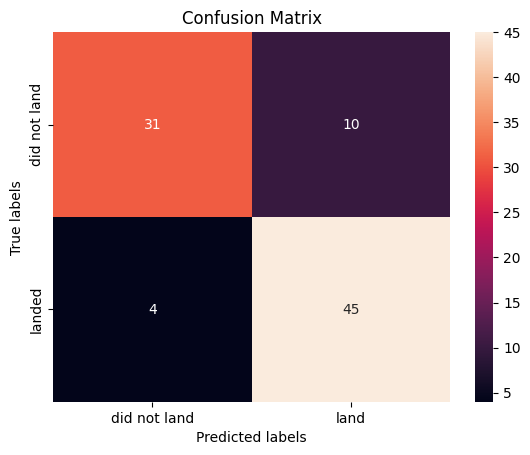

In [30]:
plot_confusion_matrix(y_test, y_pred_knnbest)

### SVM

In [31]:
svm = SVC(kernel='linear')
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

accuracy_svm = accuracy_score(y_test , y_pred_svm)
print(f"The accuracy of the svm model is: {accuracy_svm}")

The accuracy of the svm model is: 0.8222222222222222


Now we search for the best parameters for our SVM model

In [32]:
parameters = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

grid_search_svm = GridSearchCV(estimator = svm, param_grid = parameters, cv=5, verbose = 2, n_jobs=4)
grid_search_svm.fit(X_train_scaled, y_train)

print(f"The best parameters for our svm model are: {grid_search_svm.best_params_}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
The best parameters for our svm model are: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}


In [33]:
svm_best = SVC(kernel='linear', C = 10, gamma = "scale")
svm_best.fit(X_train_scaled, y_train)
y_hat_svm = svm_best.predict(X_test_scaled)

accuracy_svmbest = accuracy_score(y_test, y_hat_svm)
print(f"The accuracy for our SVM model with the best parameters is: {accuracy_svmbest}")

The accuracy for our SVM model with the best parameters is: 0.8


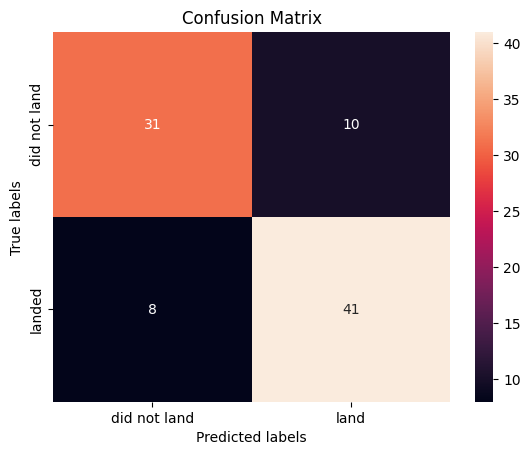

In [34]:
plot_confusion_matrix(y_test, y_hat_svm)

### Logistic Regression

In [35]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"The accuracy for our LR model is: {accuracy_lr}")

The accuracy for our LR model is: 0.8333333333333334


In [36]:
parameters_lr = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}

grid_search_lr = GridSearchCV(estimator = lr, param_grid = parameters_lr, cv = 5, verbose = 2, n_jobs = 4)
grid_search_lr.fit(X_train_scaled, y_train)

print(f"The best parameters for our LR model are: {grid_search_lr.best_params_}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
The best parameters for our LR model are: {'C': 0.01, 'max_iter': 100, 'solver': 'saga'}


In [37]:
lr_best = LogisticRegression(solver = 'liblinear', C= 0.01, max_iter = 100)
lr_best.fit(X_train_scaled, y_train)

y_pred_lrbest = lr_best.predict(X_test_scaled)

accuracy_lrbest = accuracy_score(y_test, y_pred_lrbest)
print(f"The accuracy for our LR model with the best parameters is: {accuracy_lrbest}")

The accuracy for our LR model with the best parameters is: 0.8222222222222222


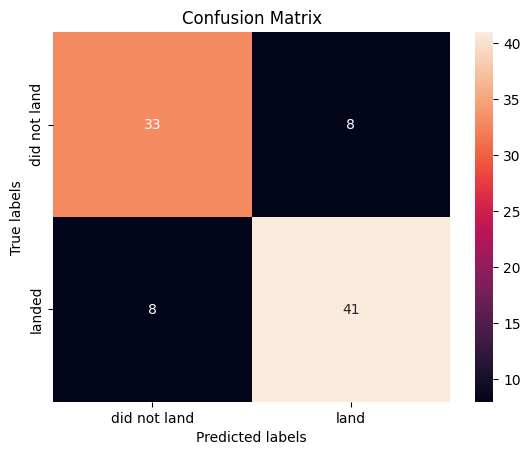

In [38]:
plot_confusion_matrix(y_test, y_pred_lrbest)

### Decission Tree Classifier

In [39]:
tree = DecisionTreeClassifier()
tree.fit(X_train_scaled, y_train)
y_pred_tree = tree.predict(X_test_scaled)

accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"The accuracy for our TreeDC model is: {accuracy_tree}")

The accuracy for our TreeDC model is: 0.7666666666666667


In [40]:
parameters_dtc = {
    'max_depth': [3, 4, 5, 6, 8, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dtc = GridSearchCV(estimator = tree, param_grid = parameters_dtc, cv = 5, verbose = 2, n_jobs = 4)
grid_search_dtc.fit(X_train_scaled, y_train)

print(f"The best parameters for our DTC model is: {grid_search_dtc.best_params_}")

Fitting 5 folds for each of 63 candidates, totalling 315 fits
The best parameters for our DTC model is: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [41]:
tree_best = DecisionTreeClassifier(max_depth = 6, min_samples_leaf =4 , min_samples_split = 10)
tree_best.fit(X_train_scaled, y_train)

y_pred_dtcbest = tree_best.predict(X_test_scaled)

accuracy_dtcbest = accuracy_score(y_test, y_pred_dtcbest)
print(f"The accuracy for our DTC model with the best parameters is: {accuracy_dtcbest}")

The accuracy for our DTC model with the best parameters is: 0.7333333333333333


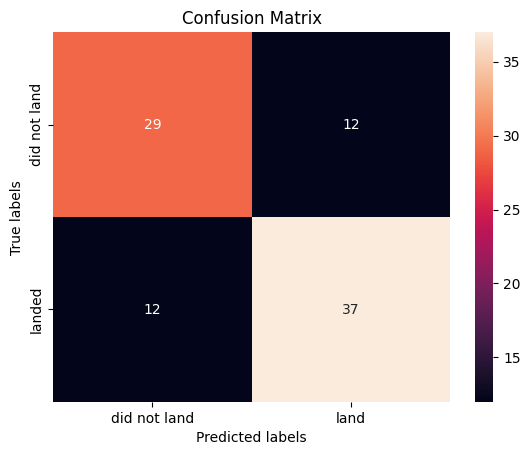

In [42]:
plot_confusion_matrix(y_test, y_pred_dtcbest)

### Results

At first sight we can observe that the model with most accuracy is the K-Nearest Neighbors model with the best parameters which achieved an accuracy of 0.84444444. We obtained a model that can predict with a relative high accuracy if a person is in danger of having a heart attack. The recommendations would be to do an electrocardiogram (ECG), a stress test, a blood pressure measurement, and a blood test to analyze in more detail with the help of professionals in health.